In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sn
from sklearn.linear_model import Lasso

In [9]:
df=pd.read_csv('House_price.csv')

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


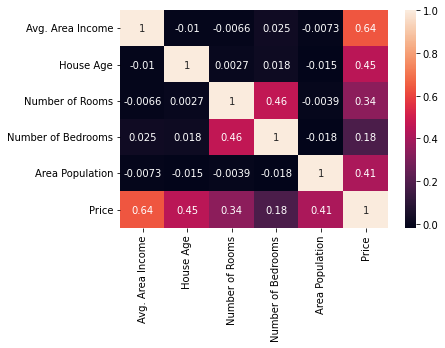

In [10]:
corr = df.corr()
sn.heatmap(corr, annot=True)
plt.show()

In [11]:
#print(df.describe())
print(df.head)

#Names of columns
for col in df.columns:
    print(col)

<bound method NDFrame.head of       Avg. Area Income  House Age  Number of Rooms  Number of Bedrooms  \
0          79545.45857   5.682861         7.009188                4.09   
1          79248.64245   6.002900         6.730821                3.09   
2          61287.06718   5.865890         8.512727                5.13   
3          63345.24005   7.188236         5.586729                3.26   
4          59982.19723   5.040555         7.839388                4.23   
...                ...        ...              ...                 ...   
4543       84556.63627   5.092459         6.723412                2.42   
4544       82732.98111   5.332712         6.198476                3.49   
4545       65694.05127   6.436741         6.704929                3.14   
4546       76061.35071   7.148713         7.546066                6.30   
4547       66935.47508   6.376390         8.513826                5.47   

      Area Population         Price  
0         23086.80050  1.059034e+06  
1    

In [12]:
Total_null_values = df.isnull().sum().sum()
print(Total_null_values)

0


In [13]:
data = df.values
X, y = data[:, :-1], data[:, -1]
print(X)

[[7.95454586e+04 5.68286132e+00 7.00918814e+00 4.09000000e+00
  2.30868005e+04]
 [7.92486424e+04 6.00289981e+00 6.73082102e+00 3.09000000e+00
  4.01730722e+04]
 [6.12870672e+04 5.86588984e+00 8.51272743e+00 5.13000000e+00
  3.68821594e+04]
 ...
 [6.56940513e+04 6.43674058e+00 6.70492911e+00 3.14000000e+00
  4.34067120e+04]
 [7.60613507e+04 7.14871312e+00 7.54606599e+00 6.30000000e+00
  4.08769646e+04]
 [6.69354751e+04 6.37638969e+00 8.51382556e+00 5.47000000e+00
  1.75736171e+04]]


In [14]:
model = Lasso(alpha = 1.0)
model.fit(X,y)
test_X = np.array([79545.45857, 5.6828, 7, 4, 23086.8])
print(model.predict([test_X]))

[1223778.02878525]


In [15]:
#export model
import pickle
with open('house_price_model.pickle','wb') as f:
    pickle.dump(model,f)

In [16]:
#export columns
import json
columns = {
    'data_columns' : [col.lower() for col in df.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))